Run with /home/levinsj/Fetal_dir/Analysis/sif/pymetaneighbor_version3.sif environment

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
import pymn
import gseapy

from gseapy import barplot, dotplot

In [2]:
#These save characters as text in PDFs
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

#These change plot aesthetics

sns.set(style='white', font_scale=1.25)
plt.rc("axes.spines", top=False, right=False)
plt.rc('xtick', bottom=True)
plt.rc('ytick', left=True)

In [3]:
adata_merge = sc.read_h5ad("/home/levinsj/Fetal_dir/CellBenderCorrected/04_annotated/MergedFetalOnly_annotated_all_final.h5ad")
background = adata_merge.var_names

In [4]:
human = gseapy.get_library_name(organism='Human')
print(human)

['ARCHS4_Cell-lines', 'ARCHS4_IDG_Coexp', 'ARCHS4_Kinases_Coexp', 'ARCHS4_TFs_Coexp', 'ARCHS4_Tissues', 'Achilles_fitness_decrease', 'Achilles_fitness_increase', 'Aging_Perturbations_from_GEO_down', 'Aging_Perturbations_from_GEO_up', 'Allen_Brain_Atlas_10x_scRNA_2021', 'Allen_Brain_Atlas_down', 'Allen_Brain_Atlas_up', 'Azimuth_2023', 'Azimuth_Cell_Types_2021', 'BioCarta_2013', 'BioCarta_2015', 'BioCarta_2016', 'BioPlanet_2019', 'BioPlex_2017', 'CCLE_Proteomics_2020', 'CORUM', 'COVID-19_Related_Gene_Sets', 'COVID-19_Related_Gene_Sets_2021', 'Cancer_Cell_Line_Encyclopedia', 'CellMarker_2024', 'CellMarker_Augmented_2021', 'ChEA_2013', 'ChEA_2015', 'ChEA_2016', 'ChEA_2022', 'Chromosome_Location', 'Chromosome_Location_hg19', 'ClinVar_2019', 'DGIdb_Drug_Targets_2024', 'DSigDB', 'Data_Acquisition_Method_Most_Popular_Genes', 'DepMap_CRISPR_GeneDependency_CellLines_2023', 'DepMap_WG_CRISPR_Screens_Broad_CellLines_2019', 'DepMap_WG_CRISPR_Screens_Sanger_CellLines_2019', 'Descartes_Cell_Types_and

Plotting of DEGs being conserved

In [5]:
Blastema_measured = pd.read_csv("/home/levinsj/spatial/Analysis/DEGs/Fetal_celltype_transition_measured_Blastema.csv", index_col = 'Unnamed: 0')
PES_measured = pd.read_csv("/home/levinsj/spatial/Analysis/DEGs/Fetal_celltype_transition_measured_PES.csv", index_col = 'Unnamed: 0')

Blastema_imputed = pd.read_csv("/home/levinsj/spatial/Analysis/DEGs/Fetal_celltype_transition_imputed_Blastema.csv", index_col = 'Unnamed: 0')
PES_imputed = pd.read_csv("/home/levinsj/spatial/Analysis/DEGs/Fetal_celltype_transition_imputed_PES.csv", index_col = 'Unnamed: 0')


In [6]:
print(Blastema_measured)
print(PES_measured)

print(Blastema_imputed)
print(PES_imputed)

        names     scores  logfoldchanges          pvals      pvals_adj
0        IGF2  25.543158        2.352058  6.541024e-144  8.007849e-140
1      COL1A1  22.958868        2.162948  1.201625e-116  9.807262e-113
2      IGFBP5  12.607374        1.657322   1.922927e-36   4.708288e-33
3      CXCL12   9.470220        1.144235   2.792547e-21   3.255977e-18
4      COL1A2   8.630256        1.184309   6.121518e-18   5.995415e-15
...       ...        ...             ...            ...            ...
24480    JAG1 -13.915278       -2.055821   5.116122e-44   1.789546e-40
24481    ENO1 -15.167274       -1.761266   5.824645e-52   2.376940e-48
24482   HMGN2 -17.331692       -0.890038   2.712317e-67   1.328222e-63
24483    H4C3 -21.016596       -1.858058   4.624330e-98   2.830668e-94
24484  IGFBP7 -26.742025       -3.330534  1.528768e-157  3.743189e-153

[24485 rows x 5 columns]
        names     scores  logfoldchanges          pvals      pvals_adj
0      IGFBP7  26.742025        3.330534  1.528768e

In [7]:
v_library='WikiPathway_2023_Human' ## 'WikiPathway_2023_Human' ###  
gset = gseapy.parser.get_library(v_library, min_size=20)

     names     pvals_adj  logfoldchanges
0  COL12A1  4.183810e-02        1.190274
1  RARRES2  2.245404e-03        0.701819
2    ITM2A  2.055716e-04        1.502277
3   COL6A3  1.678058e-04        0.717811
4   COL6A2  5.232836e-08        1.128708


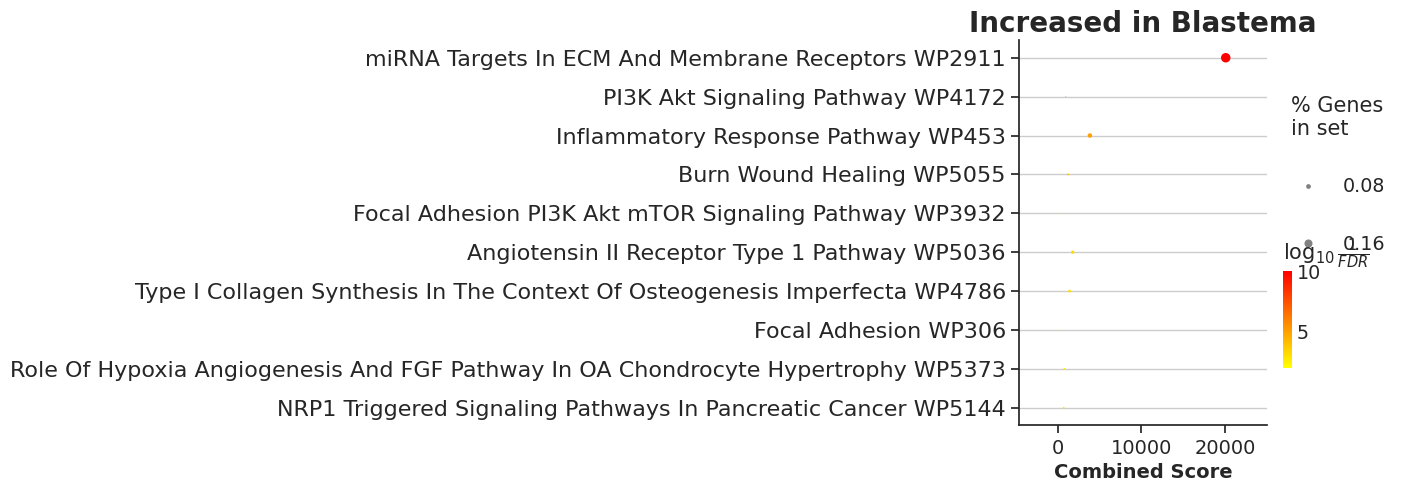

In [8]:
gene_rank = Blastema_measured[['names','pvals_adj','logfoldchanges']]
gene_rank = gene_rank[gene_rank.pvals_adj <= 0.05]
gene_rank = gene_rank[gene_rank.logfoldchanges > 0]
gene_rank.sort_values(by=['pvals_adj'], inplace=True, ascending=False)
gene_rank = gene_rank.reset_index(drop=True)
print(gene_rank.head())

enr_up = gseapy.enrichr(gene_rank.names,
                    gene_sets= gset,
                    background= background,
                    outdir=None)

gseapy.dotplot(enr_up.res2d, figsize=(4,5), title="Increased in Blastema", cmap = plt.cm.autumn_r)
plt.show()


     names  pvals_adj  logfoldchanges
0    HSPB1   0.041773        0.534312
1      CD9   0.034118        0.869834
2   MYL12A   0.031307        0.590720
3  S100A10   0.030861        0.883171
4   NOTCH1   0.024988        0.626183


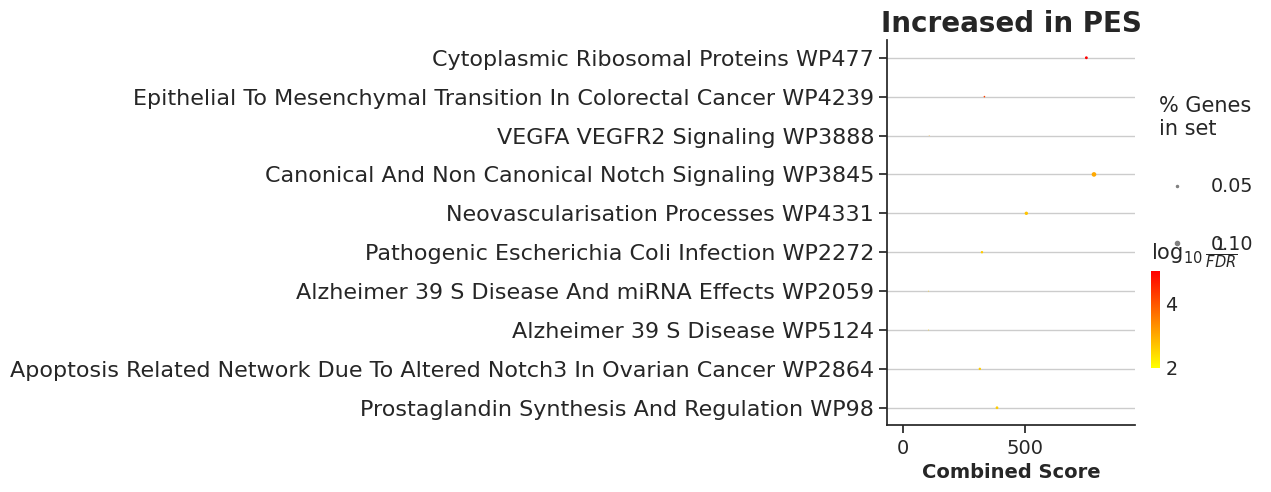

In [9]:
gene_rank = PES_measured[['names','pvals_adj','logfoldchanges']]
gene_rank = gene_rank[gene_rank.pvals_adj <= 0.05]
gene_rank = gene_rank[gene_rank.logfoldchanges > 0]
gene_rank.sort_values(by=['pvals_adj'], inplace=True, ascending=False)
gene_rank = gene_rank.reset_index(drop=True)
print(gene_rank.head())

enr_up = gseapy.enrichr(gene_rank.names,
                    gene_sets= gset,
                    background= background,
                    outdir=None)

gseapy.dotplot(enr_up.res2d, figsize=(4,5), title="Increased in PES", cmap = plt.cm.autumn_r)
plt.show()


    names  pvals_adj  logfoldchanges
0  CLASRP   0.049957        0.270444
1  PMEPA1   0.049223        0.240132
2  ZNF217   0.049108        0.253089
3    PDHX   0.049017        0.237314
4   CPSF1   0.048994        0.110927


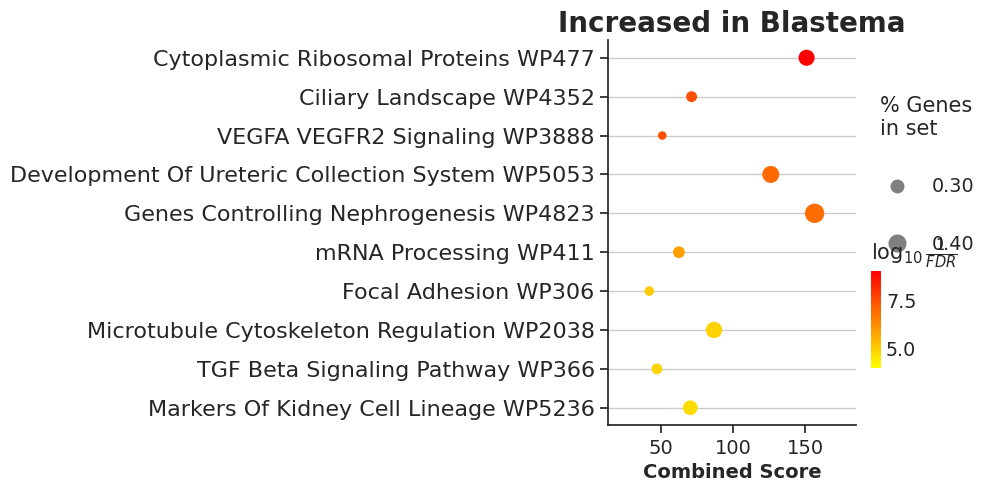

In [10]:
gene_rank = Blastema_imputed[['names','pvals_adj','logfoldchanges']]
gene_rank = gene_rank[gene_rank.pvals_adj <= 0.05]
gene_rank = gene_rank[gene_rank.logfoldchanges > 0]
gene_rank.sort_values(by=['pvals_adj'], inplace=True, ascending=False)
gene_rank = gene_rank.reset_index(drop=True)
print(gene_rank.head())

enr_up = gseapy.enrichr(gene_rank.names,
                    gene_sets= gset,
                    background= background,
                    outdir=None)

gseapy.dotplot(enr_up.res2d, figsize=(4,5), title="Increased in Blastema", cmap = plt.cm.autumn_r)
plt.show()


           names  pvals_adj  logfoldchanges
0           PBLD   0.049899        1.509906
1         RPUSD3   0.049887        0.133305
2          ZFP62   0.049687        0.331409
3  RP11-195F19.5   0.049474        0.294878
4        DNAJC16   0.049302        0.224890


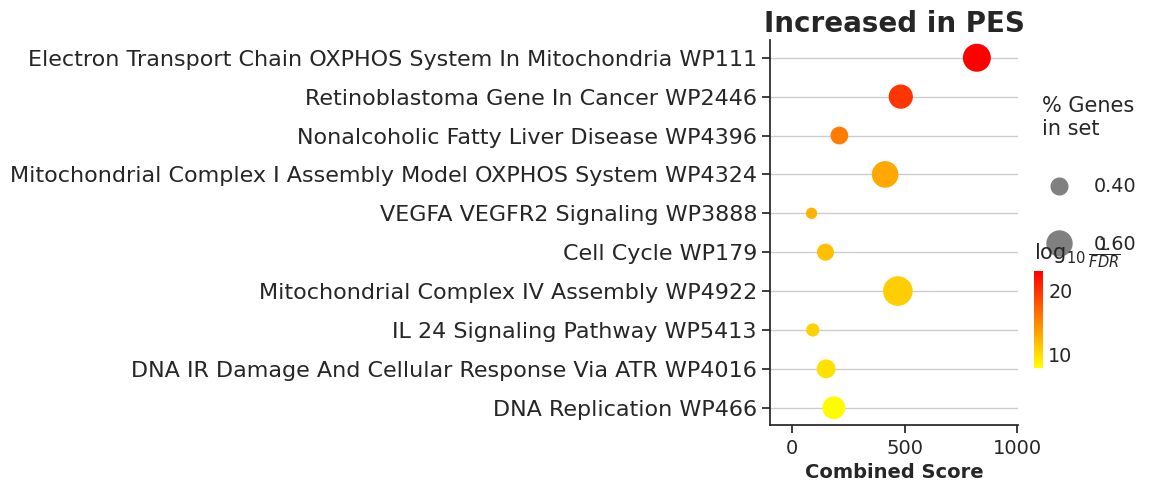

In [11]:
gene_rank = PES_imputed[['names','pvals_adj','logfoldchanges']]
gene_rank = gene_rank[gene_rank.pvals_adj <= 0.05]
gene_rank = gene_rank[gene_rank.logfoldchanges > 0]
gene_rank.sort_values(by=['pvals_adj'], inplace=True, ascending=False)
gene_rank = gene_rank.reset_index(drop=True)
print(gene_rank.head())

enr_up = gseapy.enrichr(gene_rank.names,
                    gene_sets= gset,
                    background= background,
                    outdir=None)

gseapy.dotplot(enr_up.res2d, figsize=(4,5), title="Increased in PES", cmap = plt.cm.autumn_r)
plt.show()